CHINOOK SALMON LENGTH IN THE YUKON RIVER 

This project will examine a dataset of Chinook salmon from the Yukon river delta in Alaska and Canada. These fish were captured in 2018, and outfitted with radio tracking tags in order to track their movements to their spawning grounds. These fish are valuable to the enviroment as a food source for many species of wildlife, and for traditonal owners of Alaska and the Yukon. 

    Detailed metrics such as sex, length and color were taken upon fish capture. This project will examine these metrics with relation to fish sex, and ultimate spawning location. 
 
 data aquired via https://catalog.data.gov/dataset/afsc-abl-stock-composition-timing-and-spawning-distribution-of-yukon-river-chinook-salmon

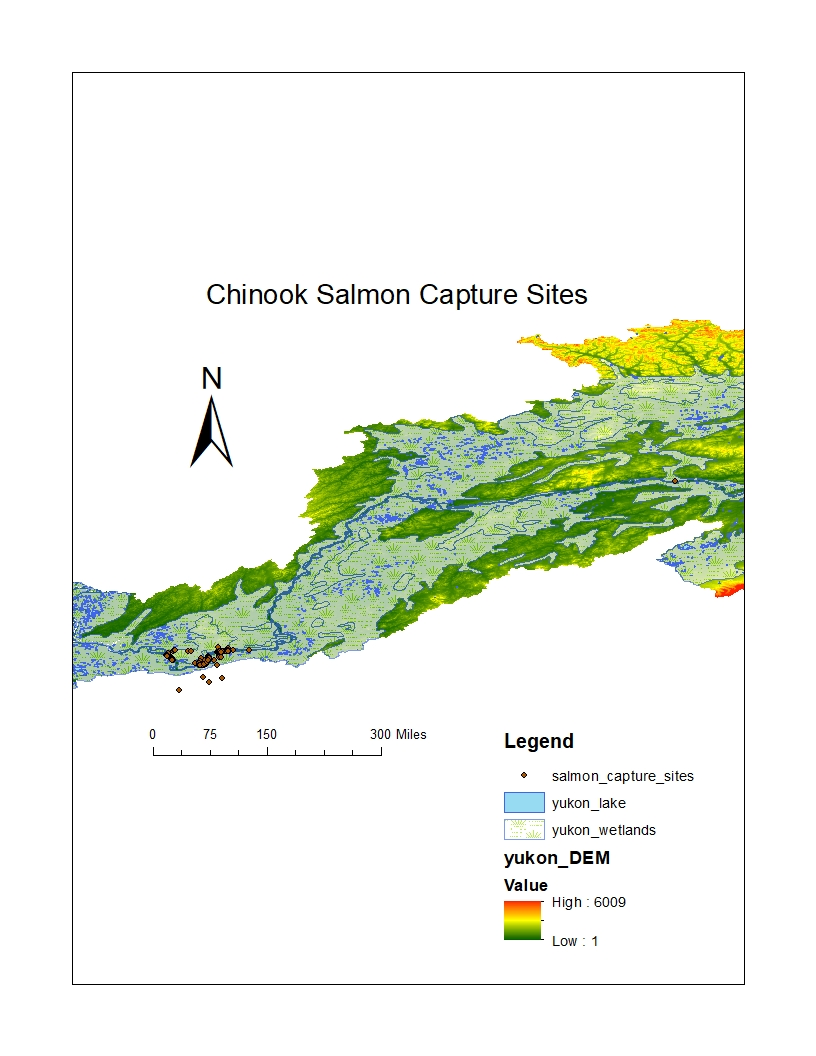

This image shows the capture locations of all of the individual fish. Gis data was downloaded from the USGS website. Indivdual capture locations were uploaded into ARCMAP to create the salmon capture site layer. 

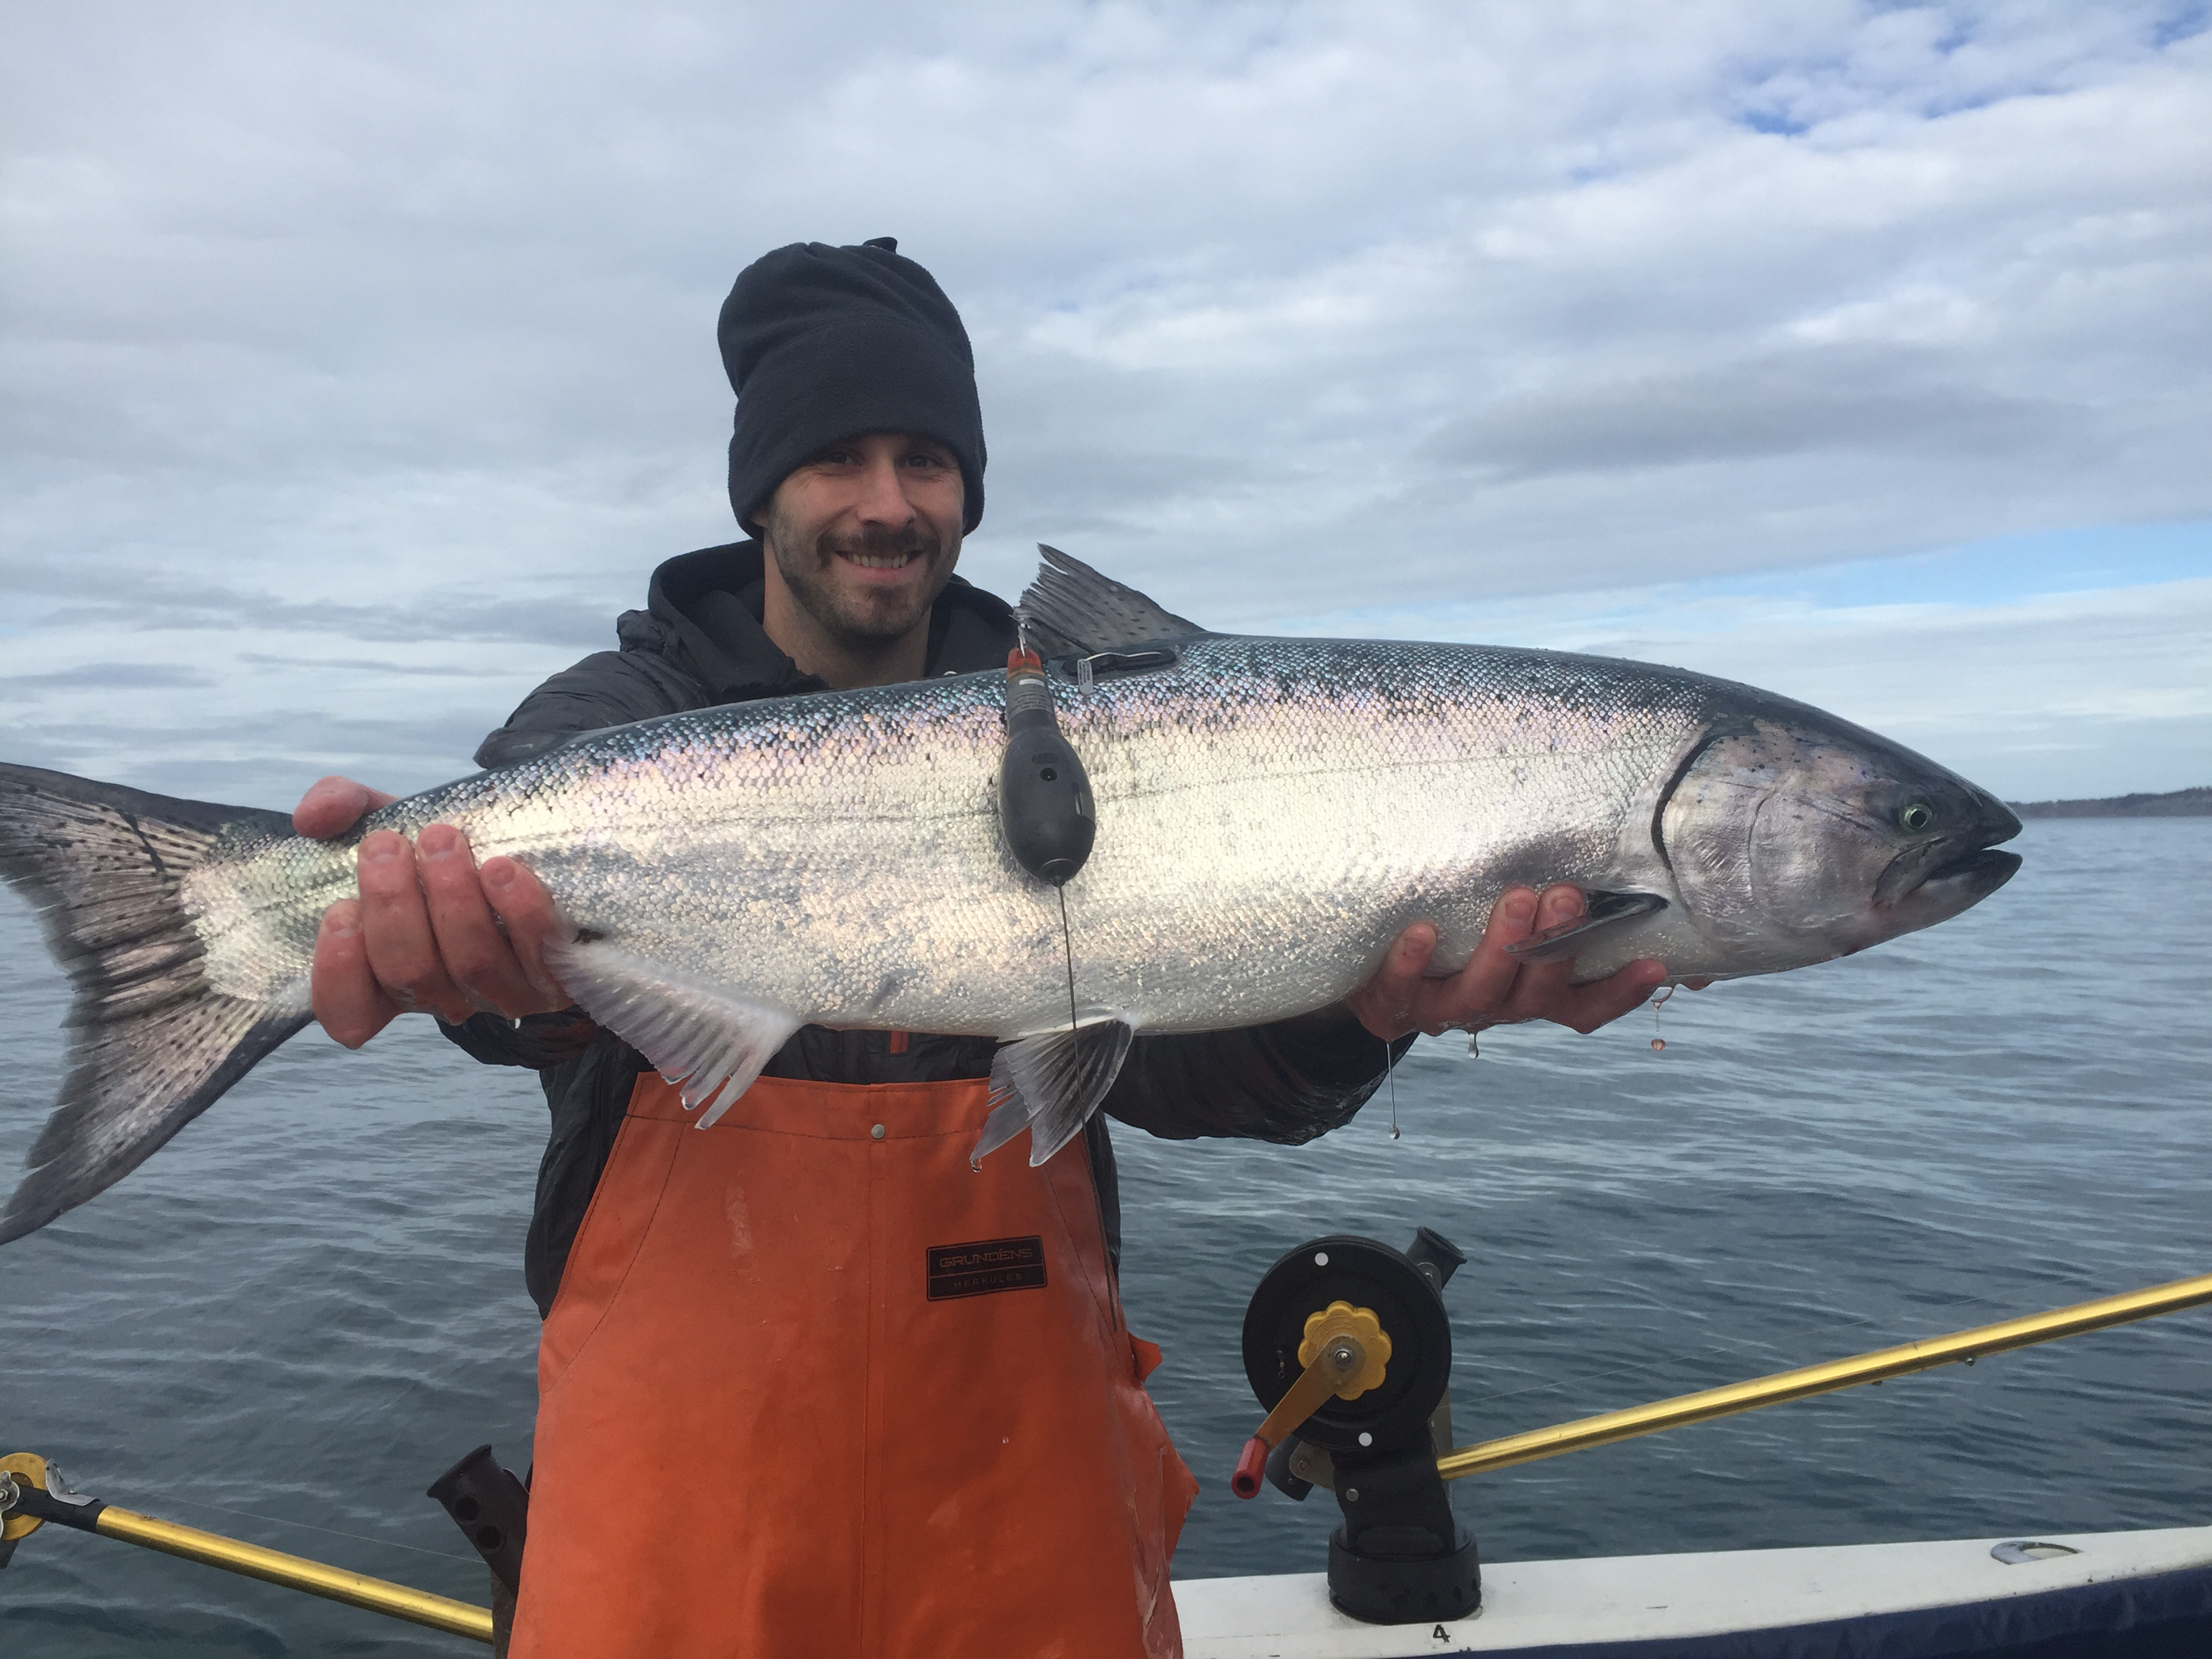

Adult chinook salmon. Image from https://news.uaf.edu/satellite-tags-reveal-whats-eating-older-chinook-salmon/

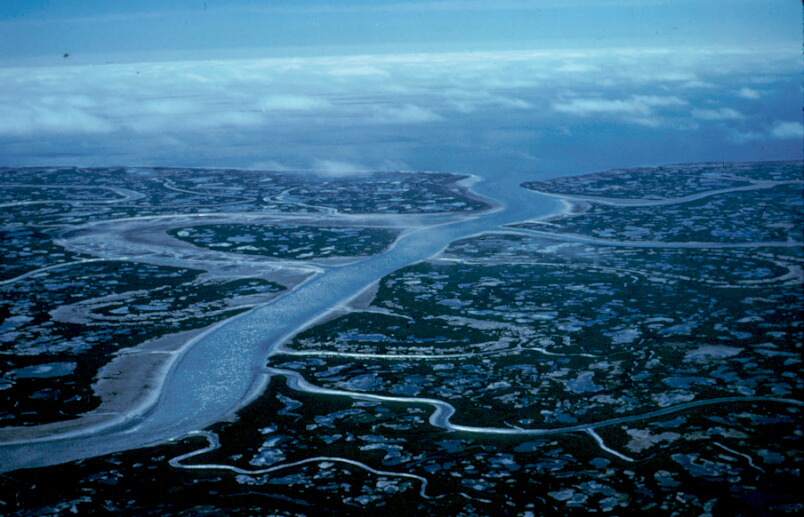

Yukon river delta. From https://en.wikipedia.org/wiki/Yukon_Delta_National_Wildlife_Refuge. This is an example of the area where data was collected. 

Alright, time to begin the analysis. Lets load the libraries and data then begin. 

In [1]:
#import the libaries
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the data
df = pd.read_csv(r'C:\Users\Devin\desktop\thinkful\capstone1\salmon_data.csv')
df.head()

UNIQUE_ID  YEAR  FISHNO  CATEGORY    AREA         CDATE_RM    CDATE_ACTUAL  \
0    2002_1  2002       1         1  4300.0  11-Jun-02 17:29  9-Jun-02 20:29   
1    2002_2  2002       2         1  8000.0  11-Jun-02 18:25  9-Jun-02 21:25   
2    2002_3  2002       3         1  6700.0  11-Jun-02 18:33  9-Jun-02 21:33   
3    2002_4  2002       4         1  4300.0  11-Jun-02 19:09  9-Jun-02 22:09   
4    2002_6  2002       6         1  4220.0  11-Jun-02 19:17  9-Jun-02 22:17   

   T_FREQ  T_CODE E_TAG  ...  CMETH  SPP  SEX  LENGTH  COLOR  SEA_LICE  AGE  \
0     684      49     Y  ...      3    1    U   765.0      1         N  5.0   
1     702      49     Y  ...      3    1    F   850.0      1         N  6.0   
2     722      49     Y  ...      3    1    F   820.0      1         N  6.0   
3     742      49     Y  ...      3    1    U   835.0      1         N  6.0   
4     842      49     Y  ...      3    1    U   840.0      1         N  6.0   

     COMMENTS  CAP_LAT   CAP_LON  
0         NaN  61.7675 -162.0226  
1         NaN  61.7534 -162.0101  
2    Injury 2  61.7619 -162.0226  
3    Injury 1  61.7634 -162.0175  
4  Injury 1,2  61.7698 -162.0222  

[5 rows x 25 columns]

First lets examine the differences between male and female fish. 

Does the average size of fish in the sample vary between male and female? 

In [3]:
# initial question: Does the length of Female and Male fish differ signicantly? 
#first, split the data into male and female groups

#male dataframe  
filt1 = (df['SEX'] == 'M')
male_df = df[filt1]

#female dataframe 
filt2 = (df['SEX'] == 'F')
female_df = df[filt2]

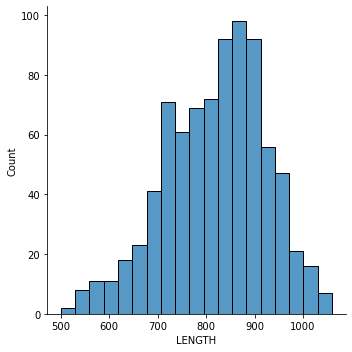

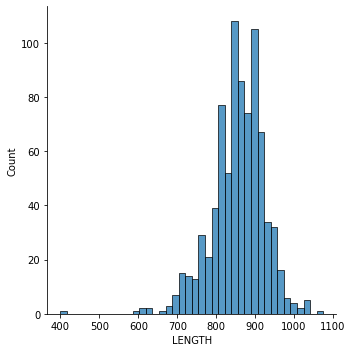

In [4]:
#lets examine the distribtion of length for each of the dataframes 

#male df 
sns.displot(male_df['LENGTH'])

#female df 
sns.displot(female_df['LENGTH'])


In [5]:
# why not run shapiro wilks for both

#First male df 
print(stats.shapiro(male_df['LENGTH']))

ShapiroResult(statistic=0.9883866906166077, pvalue=4.59701732324902e-06)


The male data frame has a regular distribution. Now lets check out the female DF

In [6]:
#female df shapiro wilks 
print(stats.shapiro(female_df['LENGTH']))

#uh no! we got some nan values, we have better drop those 
female_df['LENGTH'].isnull().values.any()

ShapiroResult(statistic=nan, pvalue=1.0)


True

We have got to drop those NAN values in the female DF for length before proceeding. 

In [7]:
#drop the values 
female_df.dropna(subset=['LENGTH'], inplace=True)

<ipython-input-7-273f26f35ed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df.dropna(subset=['LENGTH'], inplace=True)


In [8]:
#alright, lets see if that worked 
female_df['LENGTH'].isnull().values.any()

#looks Good 

False

In [9]:
#lets try that test again 
print(stats.shapiro(female_df['LENGTH']))

#looks great, very normal distribution 

ShapiroResult(statistic=0.9666091203689575, pvalue=1.0188214204578938e-12)


So now we have a normal result. Lets run a T-test. Does the size of male and female fish differ significantly? 

In [10]:
#ok now for the t-test.  
stats.ttest_ind(male_df['LENGTH'], female_df['LENGTH'])

#We have a significant result, therefore there is a signficant difference between male and female fish length 

Ttest_indResult(statistic=-8.266542230856253, pvalue=2.82396830099869e-16)

It looks like the length does differ significantly between the two. But which one is bigger? 

In [33]:
print(male_df['LENGTH'].median())
print(female_df['LENGTH'].median())

830.0
860.0


So females are just a bit larger than males in this population. I wonder if that has any implications for survival and predation rate. Larger fish may have more energy or strenght making them suitable for longer migrations. But a larger size may mean that they are more easily discovered by predators. It's hard to answer these questions with just this data though. 

In additon, I wonder if these trends extend to all Chinook Salmon. Are males always smaller than females on average? This is just one year as well. I wonder if this trend stands true between years. These fish spend many years at sea, with fish returns varying greatly from year to year. 



Lets examine some the sub-populations of fish. This dataset has categorized all of the fish's spawing grounds with a 4 digit code. Despite my best efforts, I could not find the chart determining the exact tributaries these codes stand for. But, each one of these is a smaller stream that the fish spawn in. 

Lets start by examing these area codes. 

In [15]:
#lets group by area and do some analysis 
df['AREA'].value_counts()

#5000, 2000, 6000, 1000, 4300, 6300, 6800, 2020, 6700, 4220 are all above 100

5000.0    386
2000.0    323
6000.0    285
1000.0    248
4300.0    172
6300.0    159
6800.0    156
2020.0    105
6700.0    101
4220.0    100
4000.0     98
4420.0     80
6100.0     78
5200.0     70
2280.0     46
7300.0     38
6030.0     37
6200.0     32
4100.0     32
3000.0     30
1900.0     30
2440.0     25
8000.0     24
3150.0     23
6600.0     22
8900.0     19
4130.0     12
6500.0     12
1800.0     12
6920.0     11
6450.0     10
3750.0      8
6020.0      7
2380.0      6
5400.0      6
5100.0      6
7200.0      5
2340.0      5
7000.0      5
4140.0      4
5600.0      4
7400.0      3
4200.0      3
3700.0      3
8100.0      3
5500.0      2
3950.0      2
3200.0      1
6400.0      1
5120.0      1
1700.0      1
6060.0      1
4240.0      1
3450.0      1
4260.0      1
8800.0      1
Name: AREA, dtype: int64

So, it looks like a small group of tributaries have the majoirty of the fish. I am going to isolate the dataset to those groups that contain more than 100 fish. 

In [34]:
#filter the groups down 
filt = ((df['AREA'] == 5000.0) | (df['AREA'] == 2000.0) | (df['AREA'] == 6000.0) | (df['AREA'] == 4300.0) | 
              (df['AREA'] == 6300.0) | (df['AREA'] == 6800.0) | (df['AREA'] == 2020.0) | (df['AREA'] == 6700.0) | (df['AREA'] == 4220.0))
areas_df = df[filt]

Lets check that again, see if it worked. 

In [36]:
areas_df['AREA'].value_counts()

5000.0    386
2000.0    323
6000.0    285
4300.0    172
6300.0    159
6800.0    156
2020.0    105
6700.0    101
4220.0    100
Name: AREA, dtype: int64

In [35]:
#looks good, lets group by 

area_group = areas_df.groupby(['AREA'])

<AxesSubplot:xlabel='AREA', ylabel='LENGTH'>

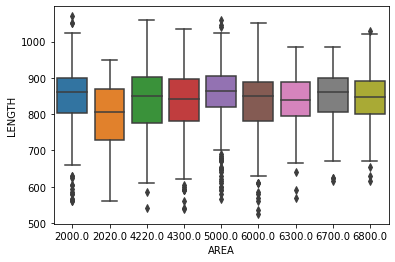

In [18]:
#lets make a boxplot of all the different length distributions 
sns.boxplot(y='LENGTH', x='AREA', data=areas_df) 
#they all look fairly similar, lets test to see if they are different 

No single group in particular stands out. Lets run some stats and see if any of them are different. 

In [19]:
#run shapiro wilks for each of the groups 
#print(stats.shapiro(area_group['LENGTH'])) 
#going to have to do this in pieces, keep getting strange tracebacks 

Looks like this way isn't going to work. Going to have to make a bunch of dataframes and run these tests individually. 

In [20]:
#isolate all of these into their own DF 
filt1 = df['AREA'] == 5000.0 
filt2 = df['AREA'] == 2000.0
filt3 = df['AREA'] == 6000.0 
filt4 = df['AREA'] == 1000.0 
filt5 = df['AREA'] == 4300.0 
filt6 = df['AREA'] == 6300.0
filt7 = df['AREA'] == 6800.0 
filt8 = df['AREA'] == 2020.0
filt9 = df['AREA'] == 6700.0
filt10 = df['AREA'] == 4220.0 
grp1 = df[filt1]
grp2 = df[filt2]
grp3 = df[filt3]
grp4 = df[filt4]
grp5 = df[filt5]
grp6 = df[filt6]
grp7 = df[filt7]
grp8 = df[filt8]
grp9 = df[filt9]
grp10 = df[filt10]

In [21]:
#checking one of the frames to see if it worked 
grp1.head()

UNIQUE_ID  YEAR  FISHNO  CATEGORY    AREA         CDATE_RM  \
7     2002_9  2002       9        11  5000.0  12-Jun-02 11:55   
16   2002_19  2002      19        11  5000.0  13-Jun-02 17:55   
25   2002_29  2002      29        11  5000.0  14-Jun-02 17:54   
30   2002_34  2002      34         4  5000.0  14-Jun-02 22:24   
34   2002_38  2002      38        11  5000.0   15-Jun-02 8:57   

       CDATE_ACTUAL  T_FREQ  T_CODE E_TAG  ...  CMETH  SPP  SEX  LENGTH  \
7   10-Jun-02 14:55     922      49     Y  ...      3    1    F   730.0   
16  11-Jun-02 20:55     902      28     Y  ...      3    1    U   670.0   
25  12-Jun-02 20:54     881      30     Y  ...      3    1    F   865.0   
30   13-Jun-02 1:24     684      32     Y  ...      3    1    F   920.0   
34  13-Jun-02 11:57     783      32     Y  ...      3    1    F   870.0   

    COLOR  SEA_LICE  AGE              COMMENTS  CAP_LAT   CAP_LON  
7       1         N  5.0              Injury 1  61.7720 -162.0214  
16      1         N  5.0              Injury 1  61.7629 -162.0142  
25      1         N  NaN          Injury 1,2,3  61.7768 -162.0312  
30      1         N  5.0  Injury 1,3, red tape  61.7783 -162.0351  
34      1         N  7.0          red tape tag  61.7743 -162.0204  

[5 rows x 25 columns]

Group 3 and 4 had some missing lenght values. Lets drop those so the shapiro test can run properly. 

In [22]:
grp3.dropna(subset=['LENGTH'], inplace=True)
grp4.dropna(subset=['LENGTH'], inplace=True)

<ipython-input-22-ab4d0d89a7bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp3.dropna(subset=['LENGTH'], inplace=True)
<ipython-input-22-ab4d0d89a7bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp4.dropna(subset=['LENGTH'], inplace=True)


In [23]:
#check if it has been dropped. 
grp3['LENGTH'].isnull().values.any()
grp4['LENGTH'].isnull().values.any()

False

In [24]:
#ok run all the tests individuallly 
print(stats.shapiro(grp1['LENGTH']))
print(stats.shapiro(grp2['LENGTH']))
print(stats.shapiro(grp3['LENGTH']))
print(stats.shapiro(grp4['LENGTH']))
print(stats.shapiro(grp5['LENGTH']))
print(stats.shapiro(grp6['LENGTH']))
print(stats.shapiro(grp7['LENGTH']))
print(stats.shapiro(grp8['LENGTH']))
print(stats.shapiro(grp9['LENGTH']))
print(stats.shapiro(grp10['LENGTH']))
#3 and 4 nan, gotta remove some nan values, now its done!  

ShapiroResult(statistic=0.9456474184989929, pvalue=1.0664772537305467e-10)
ShapiroResult(statistic=0.9538830518722534, pvalue=1.538342964124695e-08)
ShapiroResult(statistic=0.9679248929023743, pvalue=5.780966603197157e-06)
ShapiroResult(statistic=0.9305975437164307, pvalue=2.2546480238361255e-09)
ShapiroResult(statistic=0.9451034665107727, pvalue=3.3545095448062057e-06)
ShapiroResult(statistic=0.962047815322876, pvalue=0.0002405452833045274)
ShapiroResult(statistic=0.9852334856987, pvalue=0.09577372670173645)
ShapiroResult(statistic=0.9527327418327332, pvalue=0.0009060664451681077)
ShapiroResult(statistic=0.9372599720954895, pvalue=0.00012163245264673606)
ShapiroResult(statistic=0.9537975192070007, pvalue=0.001488646143116057)


Group 7 doesn't have a normal distribution. I am going to drop it from the analysis. 

In [26]:
stats.f_oneway(grp1['LENGTH'], grp2['LENGTH'], grp3['LENGTH'], grp4['LENGTH'], grp5['LENGTH'], grp6['LENGTH'], grp8['LENGTH'], 
              grp9['LENGTH'], grp10['LENGTH'])

F_onewayResult(statistic=5.606944637771282, pvalue=4.787647603731149e-07)

Ok, so one of the data sets is significantly different than the others. Some more tests will have to be run in order to determine which one(s) are different. 

Lets start by dropping the nulls and group 7. 

In [27]:
#drop the 3 and 4 nulls to get test to run 
areas_df.dropna(subset=['LENGTH'], inplace=True)


<ipython-input-27-cae9e89e334e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  areas_df.dropna(subset=['LENGTH'], inplace=True)


In [28]:
#drop group 7 
filtgrp7 = areas_df['AREA'] == 6800.0
areas_df = areas_df[~filtgrp7]

Now that all of the data has been prepared, it is time to run some analysis. I am going to run a pairwise tukey hsd test in order to see the different groups. 

In [29]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = areas_df['LENGTH'], groups = areas_df['AREA'], alpha=0.05)

tukey.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Fish from the 2200 area have a different overall length than all other major tributaries. Lets examine the median length to see where they all stack up. 

In [32]:
#get the median of the all of the area groups
area_group['LENGTH'].median()
#ok, so fish from 2020 are smaller on average than any of the other fish 

AREA
2000.0    860.0
2020.0    805.0
4220.0    852.5
4300.0    845.0
5000.0    865.0
6000.0    850.0
6300.0    840.0
6700.0    860.0
6800.0    847.5
Name: LENGTH, dtype: float64

<AxesSubplot:xlabel='AREA', ylabel='LENGTH'>

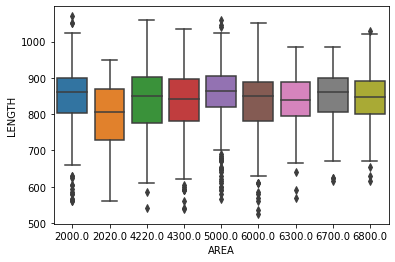

In [38]:
#one last look at the boxplot
sns.boxplot(y= 'LENGTH', x= 'AREA', data=areas_df)

Ultimatly, most fish are approximatley the same in length. It would be exciting to collect data on additonal metrics of fish physiology and genetics. 

A nearby drainage area of Bristol bay, renouned for its Sockeye salmon fishery recently had an interesting paper published about salmon genetics. The paper found that the resilence and sucess of the fish in the area was strengthened by the diversity of genotypes and phenotypes of the disparate runs. By collecting data on salmon runs, fishery managers can identify unique fish runs, and institute protections for runs that are threatened. Through the history of the area, different runs have boomed and busted, largely due to climatic conditions and stochasitic elements. 

By obtaining more pheotypic and genetic data on Yukon Chinook, we could build a more accurate picture of sub populations and their run timing. Regulations and area protections could be adapted to protect threatened subpopulations, and increase the resilance of this iconic species. 

It would have been great if more stats pertaining to the fish were available in this dataset. There was lots of data on the tags placed on the fish (tag type, #, radio frequnecy, ect.) , and other human elements that were not investigated in this report. These factors were included for documentation purposes, and not worth investigating. 

Further metrics were available such as the presence of sea lice. Less than 10 of the 2860 fish had sea lice, so this variable was not investigated. 